IV Data Plotter
Plotting 3 files with vertical offset...
✓ Loaded 161 data points from accum_0.txt
✓ Loaded 163 data points from accum_9.txt
✓ Loaded 163 data points from accum_19.txt


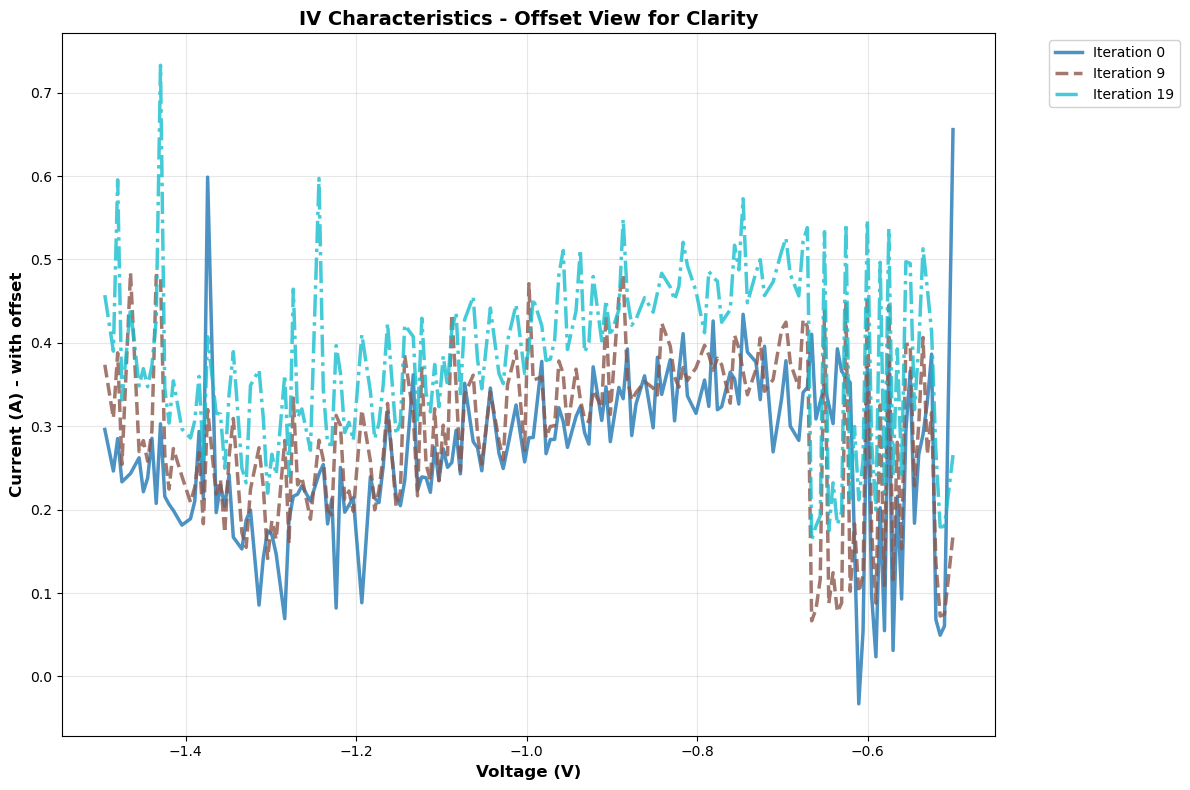

✓ Offset plot saved as 'iv_offset_plot.png' and 'iv_offset_plot.pdf'


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

def read_iv_data(filename):
    """Read IV data from text file and return x, y arrays"""
    try:
        data = np.loadtxt(filename)
        x = data[:, 0]
        y = data[:, 1]
        print(f"✓ Loaded {len(x)} data points from {filename}")
        return x, y
    except FileNotFoundError:
        print(f"✗ File not found: {filename}")
        return None, None
    except Exception as e:
        print(f"✗ Error reading {filename}: {e}")
        return None, None

def plot_iv_data(file_indices=None, file_pattern="accum_{}.txt", 
                 plot_title="IV Characteristics", save_name="iv_plot"):
    """
    Plot IV data from multiple files
    
    Parameters:
    file_indices: list of integers for file indices to plot (e.g., [0, 1, 5, 10])
                 If None, plots all files from 0 to 19
    file_pattern: string pattern for filenames with {} placeholder for index
    plot_title: title for the plot
    save_name: base name for saved files
    """
    
    # Default to all files if no specific indices given
    if file_indices is None:
        file_indices = list(range(20))  # 0 to 19
    
    # Generate distinct colors and line styles
    if len(file_indices) <= 10:
        colors = plt.cm.tab10(np.linspace(0, 1, len(file_indices)))
    else:
        colors = plt.cm.tab20(np.linspace(0, 1, len(file_indices)))
    
    # More distinct line styles and widths
    line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':'] * (len(file_indices) // 8 + 1)
    line_widths = [2.5, 2.0, 2.5, 2.0] * (len(file_indices) // 4 + 1)
    markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h'] * (len(file_indices) // 10 + 1)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    successful_plots = 0
    
    print(f"Attempting to plot {len(file_indices)} files...")
    
    for i, file_idx in enumerate(file_indices):
        filename = file_pattern.format(file_idx)
        x, y = read_iv_data(filename)
        
        if x is not None and y is not None:
            # Sort data to ensure proper line plotting
            sorted_indices = np.argsort(x)
            x_sorted = x[sorted_indices]
            y_sorted = y[sorted_indices]
            
            plt.plot(x_sorted, y_sorted, 
                    color=colors[i], 
                    linestyle=line_styles[i], 
                    linewidth=line_widths[i],
                    marker=markers[i] if len(file_indices) <= 8 else None,
                    markersize=6 if len(file_indices) <= 8 else 0,
                    markevery=max(1, len(x_sorted) // 20) if len(file_indices) <= 8 else 1,  # Show fewer markers
                    label=f'Iteration {file_idx}',
                    alpha=0.85,
                    markeredgecolor='black',
                    markeredgewidth=0.5)
            successful_plots += 1
    
    if successful_plots > 0:
        # Customize the plot
        plt.xlabel('Voltage (V)', fontsize=12, fontweight='bold')
        plt.ylabel('Current (A)', fontsize=12, fontweight='bold')
        plt.title(plot_title, fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Add legend (with smart positioning)
        if len(file_indices) <= 6:
            plt.legend(loc='best', framealpha=0.9, edgecolor='black')
        elif len(file_indices) <= 12:
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=0.9, edgecolor='black')
        else:
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize=8, 
                      framealpha=0.9, edgecolor='black')
        
        # Adjust layout
        plt.tight_layout()
        
        # Save the figure
        plt.savefig(f'{save_name}.png', dpi=300, bbox_inches='tight')
        plt.savefig(f'{save_name}.pdf', bbox_inches='tight')
        
        plt.show()
        
        print(f"\n✓ Successfully plotted {successful_plots} datasets")
        print(f"✓ Figures saved as '{save_name}.png' and '{save_name}.pdf'")
    else:
        print("\n✗ No data files could be read successfully")

# Example usage functions
def plot_all_files():
    """Plot all 20 files (0-19)"""
    plot_iv_data(file_indices=None, 
                plot_title="IV Characteristics - All Iterations", 
                save_name="iv_all_iterations")

def plot_selected_files(indices):
    """Plot specific files by index"""
    plot_iv_data(file_indices=indices, 
                plot_title=f"IV Characteristics - Selected Iterations {indices}", 
                save_name=f"iv_selected_{'-'.join(map(str, indices))}")

def plot_every_nth(n=5):
    """Plot every nth file (e.g., every 5th: 0, 5, 10, 15)"""
    indices = list(range(0, 20, n))
    plot_iv_data(file_indices=indices, 
                plot_title=f"IV Characteristics - Every {n}th Iteration", 
                save_name=f"iv_every_{n}th")

def plot_comparison_groups():
    """Plot files in comparison groups"""
    # Early iterations
    early = [0, 1, 2, 3, 4]
    plot_iv_data(file_indices=early, 
                plot_title="IV Characteristics - Early Iterations (0-4)", 
                save_name="iv_early_iterations")
    
    # Middle iterations
    middle = [7, 8, 9, 10, 11, 12]
    plot_iv_data(file_indices=middle, 
                plot_title="IV Characteristics - Middle Iterations (7-12)", 
                save_name="iv_middle_iterations")
    
    # Late iterations
    late = [15, 16, 17, 18, 19]
    plot_iv_data(file_indices=late, 
                plot_title="IV Characteristics - Late Iterations (15-19)", 
                save_name="iv_late_iterations")

# Additional plotting functions for better visualization

def plot_with_offset(file_indices, offset_factor=0.1):
    """Plot files with small vertical offset to separate overlapping curves"""
    
    if file_indices is None:
        file_indices = list(range(20))
    
    colors = plt.cm.tab10(np.linspace(0, 1, len(file_indices))) if len(file_indices) <= 10 else plt.cm.tab20(np.linspace(0, 1, len(file_indices)))
    line_styles = ['-', '--', '-.', ':'] * (len(file_indices) // 4 + 1)
    
    plt.figure(figsize=(12, 8))
    
    successful_plots = 0
    print(f"Plotting {len(file_indices)} files with vertical offset...")
    
    for i, file_idx in enumerate(file_indices):
        filename = f"accum_{file_idx}.txt"
        x, y = read_iv_data(filename)
        
        if x is not None and y is not None:
            sorted_indices = np.argsort(x)
            x_sorted = x[sorted_indices]
            y_sorted = y[sorted_indices]
            
            # Add small vertical offset
            y_offset = y_sorted + i * offset_factor * np.max(y_sorted)
            
            plt.plot(x_sorted, y_offset, 
                    color=colors[i], 
                    linestyle=line_styles[i], 
                    linewidth=2.5,
                    label=f'Iteration {file_idx}',
                    alpha=0.8)
            successful_plots += 1
    
    if successful_plots > 0:
        plt.xlabel('Voltage (V)', fontsize=12, fontweight='bold')
        plt.ylabel('Current (A) - with offset', fontsize=12, fontweight='bold')
        plt.title('IV Characteristics - Offset View for Clarity', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=0.9)
        plt.tight_layout()
        
        plt.savefig('iv_offset_plot.png', dpi=300, bbox_inches='tight')
        plt.savefig('iv_offset_plot.pdf', bbox_inches='tight')
        plt.show()
        
        print(f"✓ Offset plot saved as 'iv_offset_plot.png' and 'iv_offset_plot.pdf'")

def plot_subplot_grid(file_indices=None, cols=3):
    """Plot each file in separate subplots for easy comparison"""
    
    if file_indices is None:
        file_indices = list(range(min(12, 20)))  # Limit to 12 for readability
    
    rows = (len(file_indices) + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    elif cols == 1:
        axes = axes.reshape(-1, 1)
    
    colors = plt.cm.tab10(np.linspace(0, 1, len(file_indices)))
    
    successful_plots = 0
    
    for i, file_idx in enumerate(file_indices):
        row, col = i // cols, i % cols
        ax = axes[row, col]
        
        filename = f"accum_{file_idx}.txt"
        x, y = read_iv_data(filename)
        
        if x is not None and y is not None:
            sorted_indices = np.argsort(x)
            x_sorted = x[sorted_indices]
            y_sorted = y[sorted_indices]
            
            ax.plot(x_sorted, y_sorted, color=colors[i], linewidth=2)
            ax.set_title(f'Iteration {file_idx}', fontweight='bold')
            ax.grid(True, alpha=0.3)
            ax.set_xlabel('Voltage (V)')
            ax.set_ylabel('Current (A)')
            successful_plots += 1
    
    # Hide empty subplots
    for i in range(len(file_indices), rows * cols):
        row, col = i // cols, i % cols
        axes[row, col].set_visible(False)
    
    plt.suptitle('IV Characteristics - Individual Plots', fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    plt.savefig('iv_subplot_grid.png', dpi=300, bbox_inches='tight')
    plt.savefig('iv_subplot_grid.pdf', bbox_inches='tight')
    plt.show()
    
    print(f"✓ Subplot grid saved as 'iv_subplot_grid.png' and 'iv_subplot_grid.pdf'")
def interactive_selection():
    """Interactive file selection"""
    print("Available files: iv_data_1D_iter_0.txt to iv_data_1D_iter_19.txt")
    print("\nChoose selection method:")
    print("1. All files (0-19)")
    print("2. Specific files (enter indices)")
    print("3. Range of files (enter start-end)")
    print("4. Every nth file")
    print("6. Offset plot (vertical separation)")
    print("7. Subplot grid (individual plots)")
    
    choice = input("\nEnter your choice (1-7): ").strip()
    
    if choice == '1':
        plot_all_files()
    elif choice == '2':
        indices_str = input("Enter file indices separated by commas (e.g., 0,1,5,10): ")
        try:
            indices = [int(x.strip()) for x in indices_str.split(',')]
            indices = [i for i in indices if 0 <= i <= 19]  # Filter valid indices
            if indices:
                plot_selected_files(indices)
            else:
                print("No valid indices provided")
        except ValueError:
            print("Invalid input format")
    elif choice == '3':
        range_str = input("Enter range as start-end (e.g., 5-15): ")
        try:
            start, end = map(int, range_str.split('-'))
            start = max(0, start)
            end = min(19, end)
            if start <= end:
                indices = list(range(start, end + 1))
                plot_selected_files(indices)
            else:
                print("Invalid range")
        except ValueError:
            print("Invalid range format")
    elif choice == '4':
        try:
            n = int(input("Enter step size (e.g., 5 for every 5th file): "))
            if n > 0:
                plot_every_nth(n)
            else:
                print("Step size must be positive")
        except ValueError:
            print("Invalid step size")
    elif choice == '5':
        plot_comparison_groups()
    elif choice == '6':
        indices_str = input("Enter file indices for offset plot (e.g., 0,1,5,10) or press Enter for default: ")
        if indices_str.strip():
            try:
                indices = [int(x.strip()) for x in indices_str.split(',')]
                indices = [i for i in indices if 0 <= i <= 19]
                plot_with_offset(indices)
            except ValueError:
                print("Invalid input format")
        else:
            plot_with_offset([0, 1, 5, 10, 15, 19])
    elif choice == '7':
        indices_str = input("Enter file indices for subplot grid (e.g., 0,1,2,3,4,5) or press Enter for default: ")
        if indices_str.strip():
            try:
                indices = [int(x.strip()) for x in indices_str.split(',')]
                indices = [i for i in indices if 0 <= i <= 19]
                plot_subplot_grid(indices)
            except ValueError:
                print("Invalid input format")
        else:
            plot_subplot_grid([0, 1, 2, 3, 4, 5])
    else:
        print("Invalid choice")

# Main execution
if __name__ == "__main__":
    print("IV Data Plotter")
    print("=" * 50)
    
    # Quick examples - uncomment the one you want to use:
    
    # Example 1: Plot specific files with improved styling
    #plot_selected_files([0, 1, 5, 10, 15, 19])
    #plot_selected_files([1])
    
    
    # Example 2: Plot with vertical offset for better separation
    plot_with_offset([0, 9, 19])
    
    # Example 3: Individual subplot grid
    # plot_subplot_grid([0, 1, 2, 3, 4, 5])
    
    # Example 4: Plot every 5th file
    #plot_every_nth(5)
    
    # Example 3: Plot all files
    #plot_all_files()
    
    # Example 4: Interactive selection
    # interactive_selection()
    
    # Example 5: Custom selection
    # plot_iv_data(file_indices=[0, 2, 4, 6, 8], 
    #              plot_title="My Custom Selection", 
    #              save_name="my_custom_plot")